# IRIS DATASET - Beginner Task

### Manish Mohan

Problem Statement : Predict the optimum number of Clusters and represent it visually

**Dataset Description**
- Id            : ID of the Species
- SepalLengthCm : Length of the Sepal
- SepalWidthCm  : Width of the Sepal
- PetalLengthCm : Length of the Petal
- PetalWidthCm  : Width of the Petal
- Species       : a group of living organisms consisting of similar individuals capable of exchanging genes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Loading Dataset

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.size

900

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.drop('Id',axis=1,inplace=True)

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Missing Values

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in this dataset

# Outlier Treatment

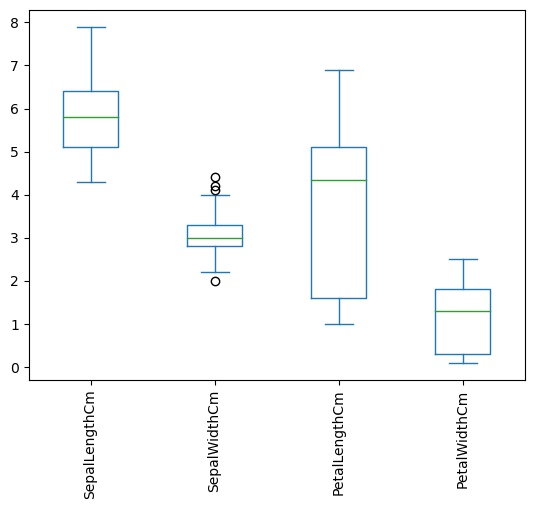

In [11]:
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

There are some outliers present in the column SepalWidthCm

# Pairplot

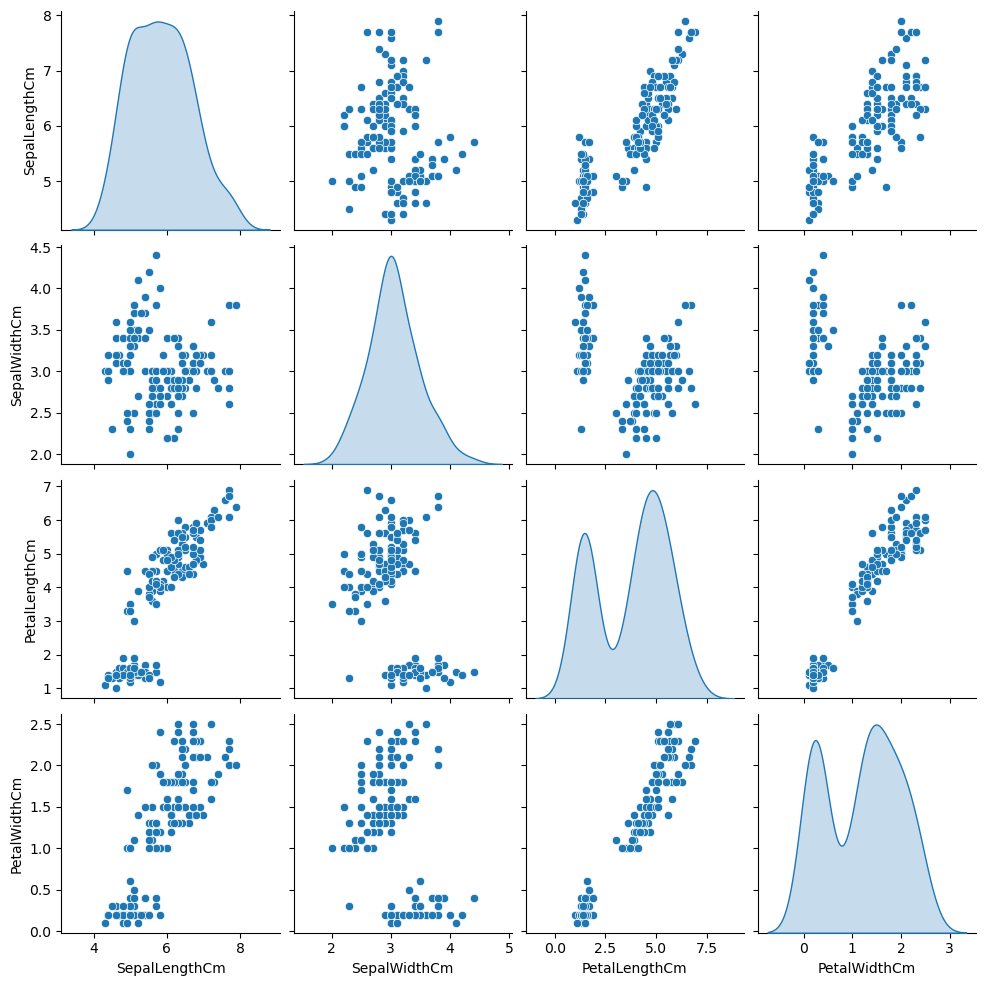

In [21]:
sns.pairplot(df_num,diag_kind='kde')
plt.show()

from pairplot, possibility of two clusters is visible

# Heatmap

<Axes: >

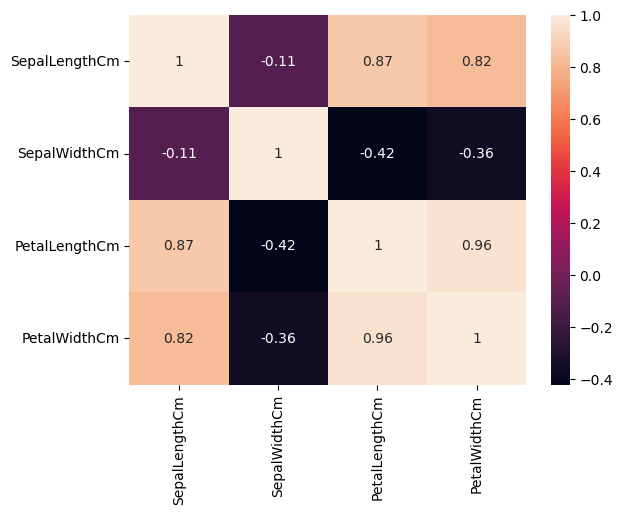

In [23]:
sns.heatmap(df_num.corr(),annot=True)

some of the features are highly correlated

# Scaling

In [12]:
df_num=df.select_dtypes(include=np.number)

In [13]:
df_num

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
ss=StandardScaler()
df_scaled=pd.DataFrame(ss.fit_transform(df_num),columns=[i  for i in df_num.columns])

In [15]:
df_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


# KMeans Algorithm

Finding best value of Cluster using WCSS

In [25]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

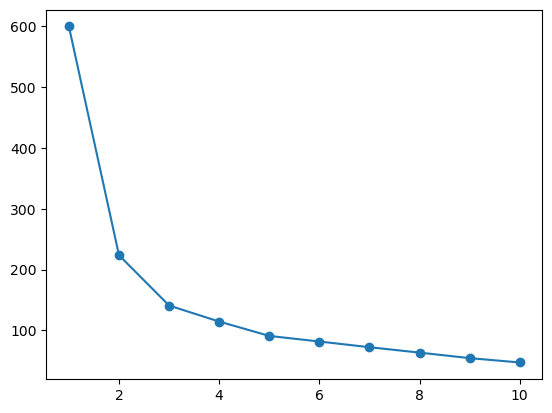

In [28]:
plt.plot(range(1,11),wcss,marker='o')
plt.show()

 Here the best value of n_cluster = 3

### Finding best value of n_cluster using Silhouette Score 

In [34]:
sc=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    sc.append(silhouette_score(df_scaled,kmeans.labels_))

<BarContainer object of 9 artists>

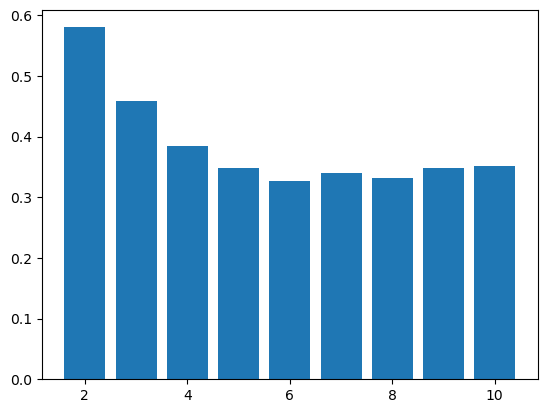

In [35]:
plt.bar(range(2,11),sc)

### Silhouette Visualizer

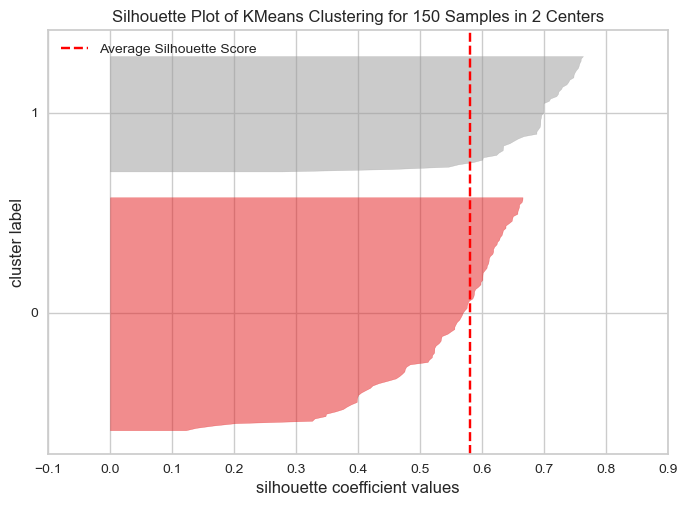

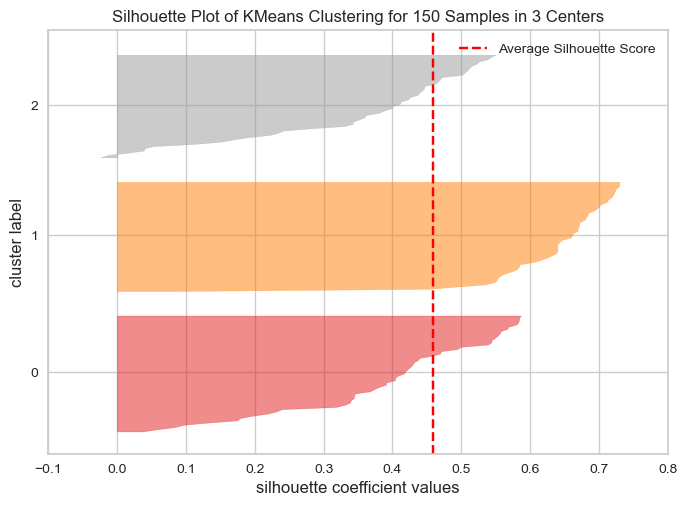

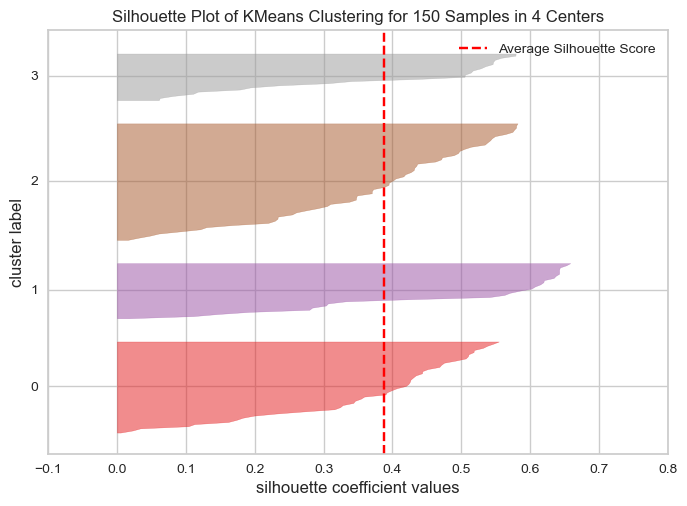

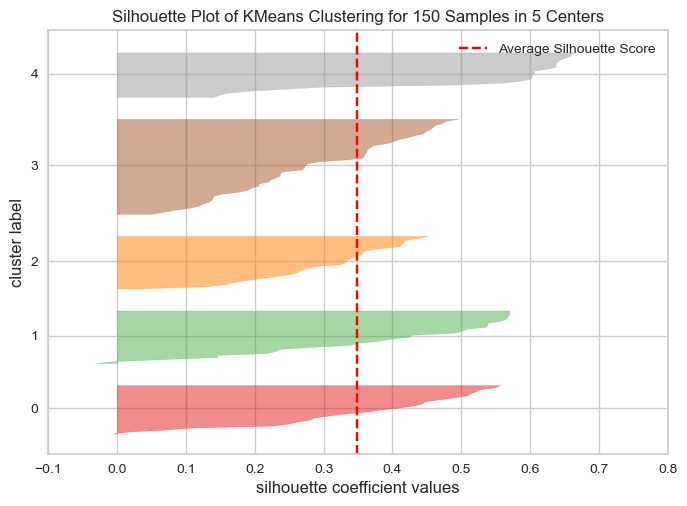

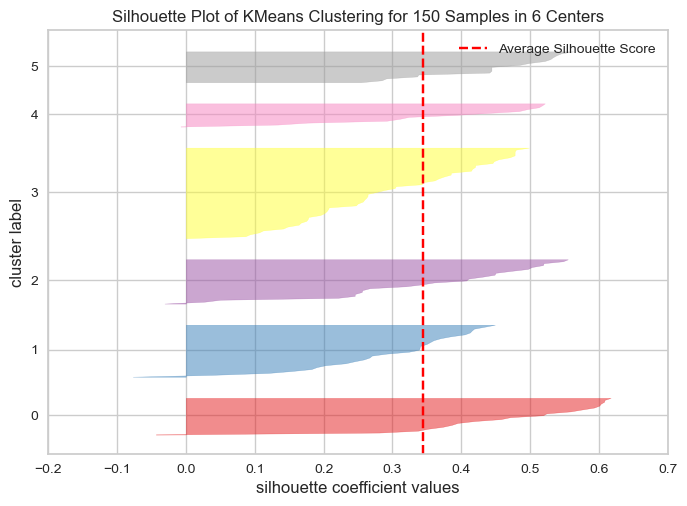

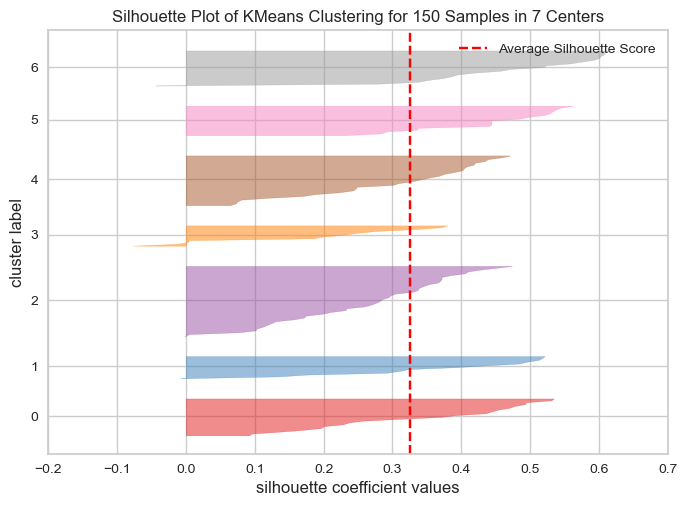

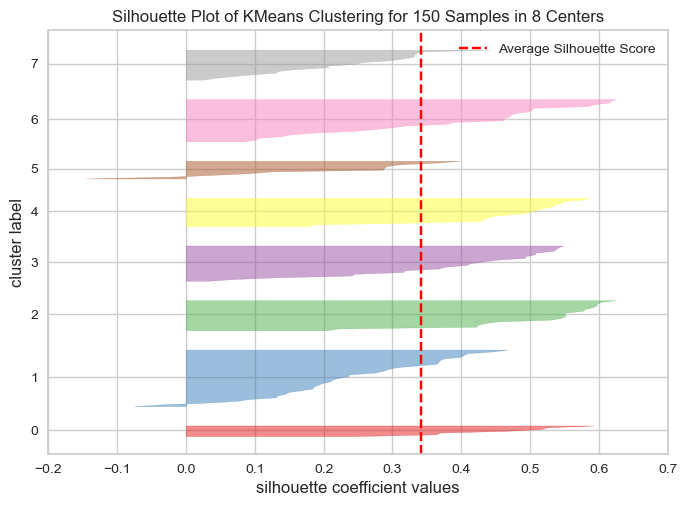

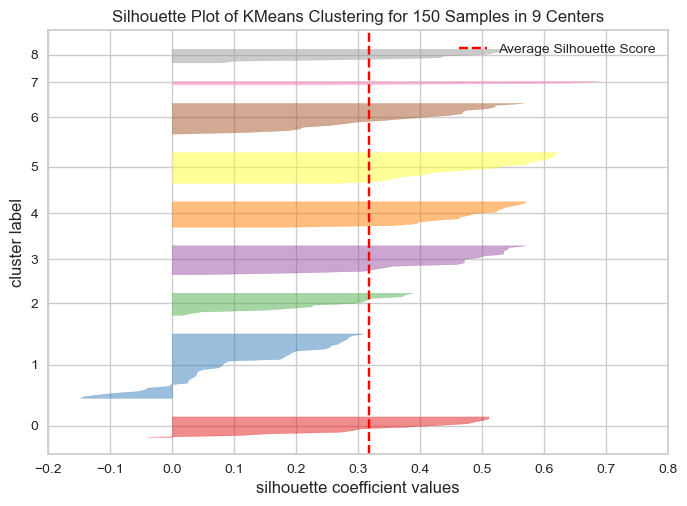

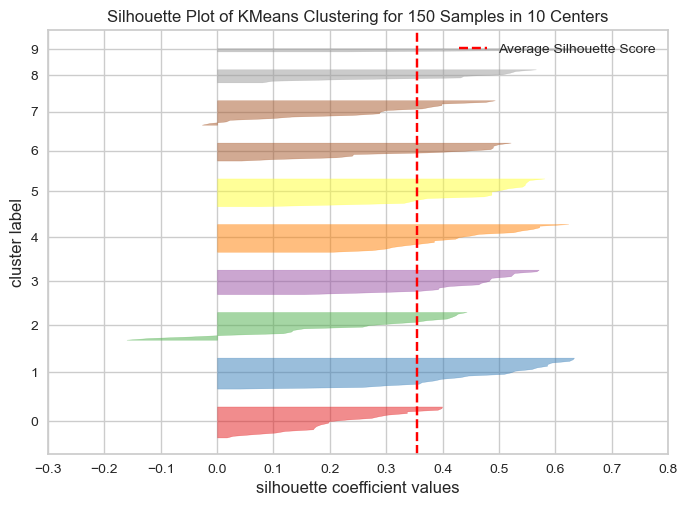

In [37]:
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    viz=SilhouetteVisualizer(kmeans,color='yellowbrick')
    viz.fit(df_scaled)
    viz.show()

#### After Analysing Silhouette Visualizer the best value of cluster is 2

#### Building clusters using KMeans algorithm

In [38]:
kmeans_model=KMeans(n_clusters=2,random_state=10)
kmeans_model.fit(df_scaled)

KMeans(n_clusters=2, random_state=10)

In [39]:
kmeans_model.inertia_

223.73200573676345

In [40]:
kmeans_model.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.50728948, -0.4211534 ,  0.65243918,  0.62756431]])

In [41]:
df['Label_kmeans']=kmeans_model.labels_

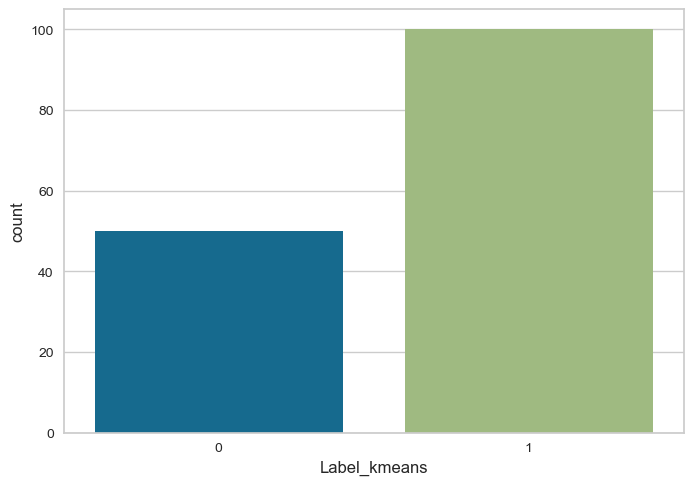

In [49]:
sns.countplot(x=df['Label_kmeans'])
plt.show()

In [50]:
df[df['Label_kmeans']==0].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label_kmeans
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,5.00600,3.418000,1.464000,0.24400,0.0
std,0.35249,0.381024,0.173511,0.10721,0.0
min,4.30000,2.300000,1.000000,0.10000,0.0
25%,4.80000,3.125000,1.400000,0.20000,0.0
50%,5.00000,3.400000,1.500000,0.20000,0.0
75%,5.20000,3.675000,1.575000,0.30000,0.0
max,5.80000,4.400000,1.900000,0.60000,0.0


Flowers with sepal length around 5cm, sepal width 3cm, petal length 1.46cm and petal width 0.24cm belongs to cluster 0.

In [51]:
df[df['Label_kmeans']==1].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label_kmeans
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,6.262000,2.872000,4.906000,1.676000,1.0
std,0.662834,0.332751,0.825578,0.424769,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.800000,2.700000,4.375000,1.300000,1.0
50%,6.300000,2.900000,4.900000,1.600000,1.0
75%,6.700000,3.025000,5.525000,2.000000,1.0
max,7.900000,3.800000,6.900000,2.500000,1.0


Flowers with sepal length around 6.2cm, sepal width 2.8cm, petal length 4.9cm and petal width 1.6cm belongs to cluster 1.